## VGG16 Model to detect whether a person is normal or is affected by COVID or Pneumonia






# Importing neccesary Libraries

In [7]:


from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# To split image data into training and testing

In [4]:

# import os

# import numpy as np

# import shutil

# rootdir= '/content/drive/MyDrive/Colab Notebooks/covid19_detection /covid_dataset' #path of the original folder

# classes = ['COVID', 'Normal', 'Viral Pneumonia']

# for i in classes:

#     os.makedirs(rootdir +'/train/' + i)

#     os.makedirs(rootdir +'/test/' + i)

#     source = rootdir + '/' + i

#     allFileNames = os.listdir(source)

#     np.random.shuffle(allFileNames)

#     test_ratio = 0.25

#     train_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                       [int(len(allFileNames)* (1 - test_ratio))])

#     train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
#     test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

#     for name in train_FileNames:
#         shutil.copy(name, rootdir +'/train/' + i)

#     for name in test_FileNames:
#         shutil.copy(name, rootdir +'/test/' + i)

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/covid19_detection /covid_dataset/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/covid19_detection /covid_dataset/test'


# Importing the Vgg 16 library and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

In [8]:


vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




58892288/58889256 [==============================] - 0s 0us/step


In [9]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [22]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/covid19_detection /covid_dataset/train/*')

In [23]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [24]:
len(folders)

3

In [25]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [26]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [27]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/covid19_detection /covid_dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 11364 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/covid19_detection /covid_dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3789 images belonging to 3 classes.


In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
356/356 [==============================] - 211s 486ms/step - loss: 0.5279 - accuracy: 0.8095 - val_loss: 0.1975 - val_accuracy: 0.9232
Epoch 2/5
356/356 [==============================] - 165s 464ms/step - loss: 0.2161 - accuracy: 0.9166 - val_loss: 0.1965 - val_accuracy: 0.9279
Epoch 3/5
356/356 [==============================] - 165s 464ms/step - loss: 0.1909 - accuracy: 0.9275 - val_loss: 0.1437 - val_accuracy: 0.9493
Epoch 4/5
356/356 [==============================] - 165s 464ms/step - loss: 0.1649 - accuracy: 0.9419 - val_loss: 0.1420 - val_accuracy: 0.9464
Epoch 5/5
356/356 [==============================] - 165s 464ms/step - loss: 0.1478 - accuracy: 0.9457 - val_loss: 0.1448 - val_accuracy: 0.9467


In [30]:
r.history

{'accuracy': [0.8636043667793274,
  0.9152587056159973,
  0.9253783822059631,
  0.9364660382270813,
  0.9420978426933289],
 'loss': [0.3524938225746155,
  0.2178124487400055,
  0.19144433736801147,
  0.17624522745609283,
  0.15310390293598175],
 'val_accuracy': [0.9231987595558167,
  0.9279493093490601,
  0.9493269920349121,
  0.9464238882064819,
  0.9466877579689026],
 'val_loss': [0.19746620953083038,
  0.19650225341320038,
  0.14369788765907288,
  0.14201602339744568,
  0.1447616070508957]}

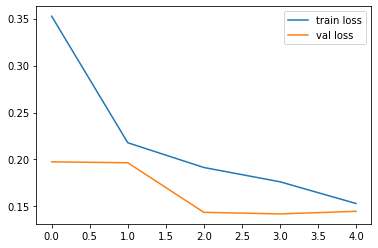

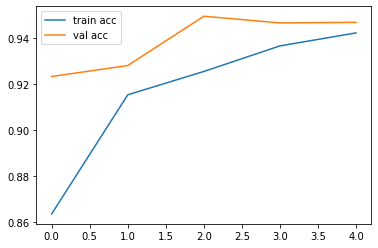

<Figure size 432x288 with 0 Axes>

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/MyDrive/Colab Notebooks/covid19_detection/covid_detection.h5')

In [ ]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3





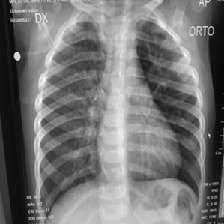

In [54]:
from tensorflow.keras.preprocessing import image
import cv2
img_path ='/content/drive/MyDrive/Colab Notebooks/covid19_detection /covid_dataset/Copy of COVID-4.png'
img = image.load_img(img_path, target_size=(224, 224))
img

In [55]:
import numpy as np
def model_predict(img):
    x = image.img_to_array(img)
    x = np.array(x)
    x = np.expand_dims(x, axis=0)
    x = x.astype('float32')/255
    preds = model.predict(x)
    preds = np.argmax(preds)
    classes = ['COVID','Normal','Pneumonia']
    preds = classes[preds]
    preds = print('The pateint is a {} pateint'.format(preds))
    return preds

In [56]:
predict(img)

The pateint is a COVID pateint


'COVID'